In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import csv
import pandas as pd

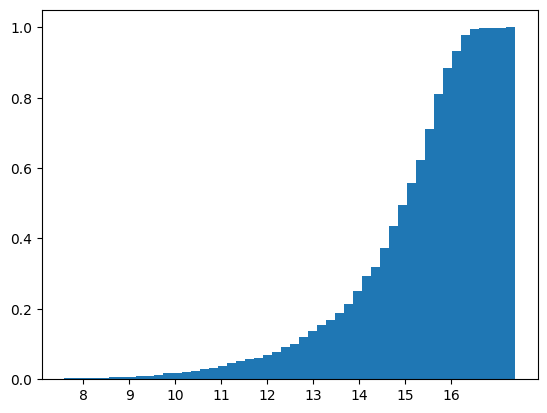

<Axes: ylabel='Frequency'>

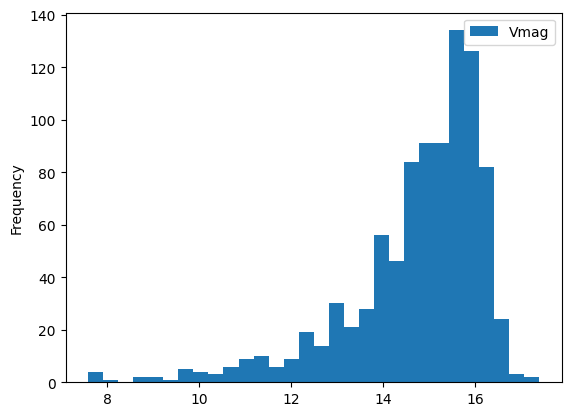

In [10]:
data = pd.read_csv("apass.csv", usecols=["Vmag", "RAJ2000", "DEJ2000", "B-V"])
#mask = (data["Vmag"] < 16) & (data["Vmag"] > 10)
#data = data[mask].dropna()

df = pd.read_csv('apass.csv')
df.dropna(inplace=True)
vmag = df["Vmag"].values
x = df['RAJ2000'].values
y = df['DEJ2000'].values
bv = df["B-V"].values

v_array = data["Vmag"].to_numpy()
ra_array = data["RAJ2000"].to_numpy()
de_array = data["DEJ2000"].to_numpy()
bv_array = data["B-V"].to_numpy()

plt.xticks(np.arange(1, 17 , 1))
plt.hist(vmag, bins=50, cumulative=True, density=True)
plt.show()
data.plot(kind="hist", bins=30, y="Vmag")

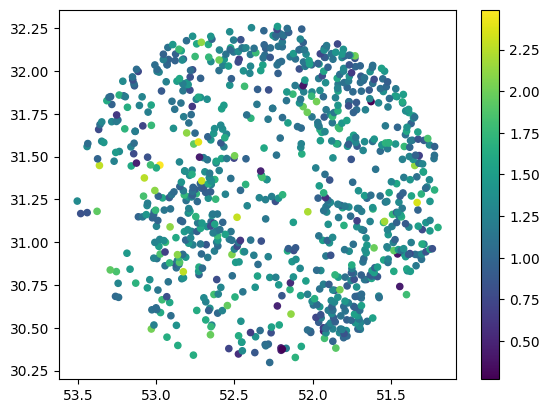

In [11]:
#data.dropna()
#data.plot(kind="scatter", x="RAJ2000", y="DEJ2000", colorbar=True, c=("B-V"))

plt.scatter(ra_array, de_array, c=bv_array, s=20)
plt.colorbar()
plt.gca().invert_xaxis()

Selected points: 43


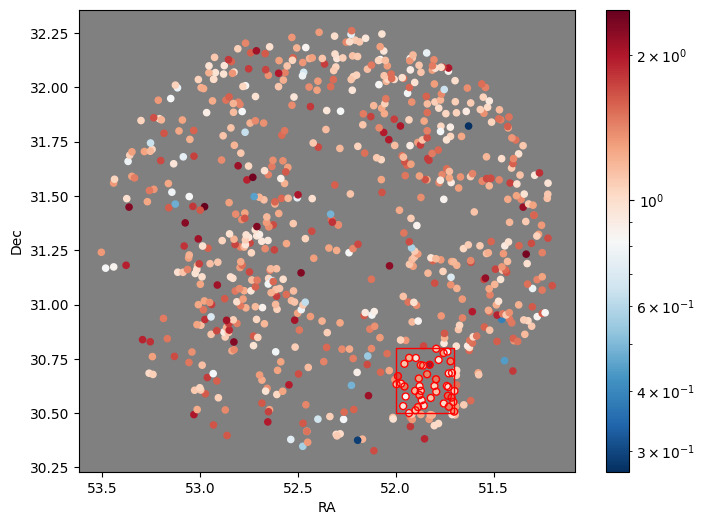

In [12]:
mag_mask = vmag < 16
df = df[mag_mask]

vmag = df["Vmag"].values
x = df['RAJ2000'].values
y = df['DEJ2000'].values
bv = df["B-V"].values


fig, ax = plt.subplots(figsize=(8,6))
sc = ax.scatter(x, y, s=20, cmap='RdBu_r', c=bv, norm='log')  # color by whatever you like

# define rectangle: lower-left corner (xmin, ymin) and width/height
xmin, ymin = 51.7, 30.5
width, height = 0.3, 0.3
rect = Rectangle((xmin, ymin), width, height, edgecolor='red', facecolor='none', linewidth=1)
ax.add_patch(rect)

# boolean mask to get points inside
mask = (x >= xmin) & (x <= xmin + width) & (y >= ymin) & (y <= ymin + height)
selected_df = df[mask]          # dataframe of the selected points
print("Selected points:", len(selected_df))

# highlight selected points on the plot
ax.scatter(x[mask], y[mask], facecolors='none', edgecolors='red', s=25)
ax.set_xlabel('RA'); ax.set_ylabel('Dec')
ax.set_facecolor("grey")
fig.colorbar(sc)
plt.gca().invert_xaxis()
plt.show()
# now selected_df contains the rows that fell inside the rectangle

In [13]:
mean_bv = np.mean(selected_df["B-V"].values)
std_bv = np.std(selected_df["B-V"].values)
print(mean_bv)
print(std_bv)

1.1616046511627904
0.2513113643248785


In [14]:
corr_bv = df["B-V"].values - mean_bv

def red_law(R_v, bv):
    a_v = R_v * bv
    return a_v

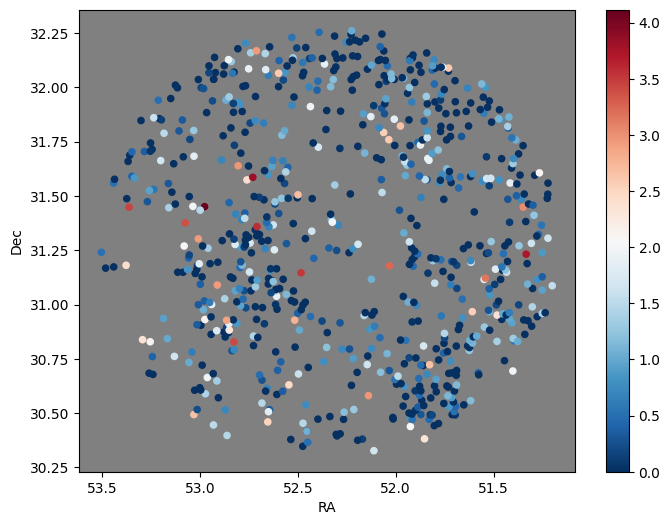

In [15]:
R_v = 3.1
fig, ax = plt.subplots(figsize=(8,6))
sc = ax.scatter(x, y, s=20, cmap='RdBu_r', c=red_law(R_v, corr_bv), vmin=0)  # color by whatever you like


ax.set_xlabel('RA'); ax.set_ylabel('Dec')
fig.colorbar(sc)
ax.set_facecolor("grey")
plt.gca().invert_xaxis()
plt.show()